In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from numpy import asarray
from numpy import save
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
import os
from os import listdir
import cv2 as cv
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [ ]:

folder = '/content/drive/MyDrive/data_train/banh_beo' #0
folder1='/content/drive/MyDrive/data_train/banh_bot_loc'
folder2='/content/drive/MyDrive/data_train/banh_can'
folder3='/content/drive/MyDrive/data_train/banh_cuon'
folder4='/content/drive/MyDrive/data_train/banh_gio'
folder5='/content/drive/MyDrive/data_train/xoi_gac'
folder6='/content/drive/MyDrive/data_train/xoai_lac'
folder7='/content/drive/MyDrive/data_train/pha_lau'
folder8='/content/drive/MyDrive/data_train/com_chay'
folder9='/content/drive/MyDrive/data_train/mi_quang'

folders=[folder,folder1,folder2,folder3,folder4,folder5,folder6,folder7,folder8,folder9]
photos, labels = list(), list()
for i in range (10):
  for file in listdir(folders[i]):
    output=i

    photo = load_img(folders[i]+'/'+file, target_size=(100,100))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('food_photos.npy',photos)
save('food_labels.npy',labels)

(5588, 100, 100, 3) (5588,)


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [ ]:

x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(10, activation='Softmax'))

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
31/31 [==============================] - 2s 57ms/step - loss: 2.2936 - accuracy: 0.1874 - val_loss: 2.0160 - val_accuracy: 0.2445
Epoch 2/100
31/31 [==============================] - 2s 50ms/step - loss: 1.9092 - accuracy: 0.3194 - val_loss: 1.8526 - val_accuracy: 0.3411
Epoch 3/100
31/31 [==============================] - 2s 50ms/step - loss: 1.7067 - accuracy: 0.4053 - val_loss: 1.7074 - val_accuracy: 0.4120
Epoch 4/100
31/31 [==============================] - 2s 49ms/step - loss: 1.5105 - accuracy: 0.4896 - val_loss: 1.7146 - val_accuracy: 0.4061
Epoch 5/100
31/31 [==============================] - 1s 48ms/step - loss: 1.4076 - accuracy: 0.5265 - val_loss: 1.7069 - val_accuracy: 0.4180
Epoch 6/100
31/31 [==============================] - 1s 49ms/step - loss: 1.1542 - accuracy: 0.6144 - val_loss: 1.7730 - val_accuracy: 0.3965
Epoch 7/100
31/31 [==============================] - 1s 49ms/step - loss: 0.9488 - accuracy: 0.6957 - val_loss: 1.7112 - val_accuracy: 0.4407
Epoch 

array([9])

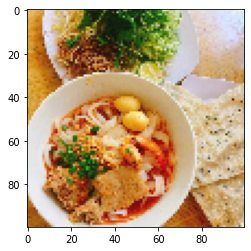

In [ ]:
from keras.preprocessing import image
pic = image.load_img('/content/miquang.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#banh_beo, banh_bot_loc, banh_can, banh_cuon, banh_gio, xoi_gac, xoai_lac, pha_lau, com_chay, mi_quang

array([7])

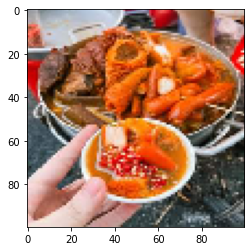

In [ ]:
from keras.preprocessing import image
pic = image.load_img('/content/phalau.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#banh_beo, banh_bot_loc, banh_can, banh_cuon, banh_gio, xoi_gac, xoai_lac, pha_lau, com_chay, mi_quang